In [23]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

!pip install torchsummary
import torchsummary

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Tensor basics

In [4]:
T = torch.from_numpy(np.array([1,2,3,4])).float()
T.exp_() # inplace operations end with _

# T.cuda() # moves data to GPU memory
numpy_Tensor = T.cpu().numpy() # create a numpy array out of torch.Tensor 

T.to('cpu')
# T.to('cuda')

im = plt.imread('/home/i008/widget.png')
torch.from_numpy(im).shape

torch.Size([455, 1067, 3])

### Autograd

In [5]:
# Create tensors.
x = torch.tensor(10., requires_grad=True)

# Create the computetional graph
res = x ** 2

# propagate the gradients
res.backward()

# Print out the gradients.
print("The derivative of x ** 2 is 2x")
print("result:", float(x.grad))  

The derivative of x ** 2 is 2x
result: 20.0


# Loss Functions

In [42]:
preds = torch.Tensor([[0.2, 0.8],[0.9, 0.1]]).float()
target = torch.Tensor([0, 1]).long()

print("Cross Entropy:")
print(F.cross_entropy(preds, target))
# print(nn.CrossEntropyLoss()(preds, target))


preds = torch.Tensor([[1],[2],[0.9]])
target = torch.Tensor([[1.3], [2.4], [0.9]])

print(F.mse_loss(preds, target))
print(nn.MSELoss()(preds, target))

Cross Entropy:
tensor(1.1043)
tensor(0.0833)
tensor(0.0833)


### Disable gradient computation with no_grad context manager (useful during inference)

In [6]:
with torch.no_grad():
    t = torch.tensor([1,2,3]).float()
    t = t ** 2
    print(t)
    print(t.grad)

tensor([1., 4., 9.])
None


### get the available computational device CUDA if availble otherwise CPU


In [7]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


### Use the view function to get a new tensor with a different shape  but without touching the memory


In [8]:
t1 = torch.randn(1,5)
t1.view(5,1)

t.squeeze(0) # remove first dimension
t.unsqueeze(0) # expand by adding the first dimension

tensor([[1., 4., 9.]])

### Defining models
![alt text](https://i.stack.imgur.com/2MVdW.png "Title")


In [11]:
class Perceptron(nn.Module):
    def __init__(self, n_in, n_out):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(n_in, n_out, bias=True)

    def forward(self, x):
        return self.fc(x)

perceptron = torch.nn.Sequential(nn.Linear(1000, 1000))
p = Perceptron(1000, 1000)
torchsummary.summary(p.to(DEVICE), input_size=(1,1000,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1        [-1, 1, 1000, 1000]       1,001,000
Total params: 1,001,000
Trainable params: 1,001,000
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.81
Forward/backward pass size (MB): 7.63
Params size (MB): 3.82
Estimated Total Size (MB): 15.26
----------------------------------------------------------------


In [12]:
for method in dir(p):
    if not method.startswith('_'): print(method)

add_module
apply
buffers
children
cpu
cuda
double
dump_patches
eval
extra_repr
fc
float
forward
half
load_state_dict
modules
named_buffers
named_children
named_modules
named_parameters
parameters
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_parameter
share_memory
state_dict
to
train
training
type
zero_grad


### Custom model weights

In [10]:
def custom_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
        
p.apply(custom_weights)

Perceptron(
  (fc): Linear(in_features=1000, out_features=1000, bias=True)
)

### Model persistance and loading

In [59]:
p = Perceptron(2, 2)
torch.save(p.state_dict(), 'model.torch')
p.load_state_dict(torch.load('model.torch'))


print(p.state_dict())


OrderedDict([('fc.weight', tensor([[-0.2540, -0.1115],
        [ 0.2427, -0.0376]])), ('fc.bias', tensor([-0.6197,  0.5179]))])


### Parameters

In [62]:
for params in p.parameters():
    print(params)

Parameter containing:
tensor([[-0.2540, -0.1115],
        [ 0.2427, -0.0376]], requires_grad=True)
Parameter containing:
tensor([-0.6197,  0.5179], requires_grad=True)


### Activation functions

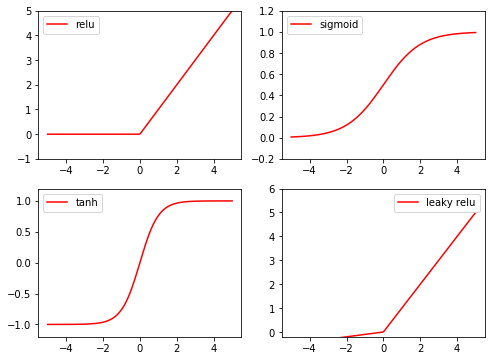

In [236]:

# fake data
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)
x_np = x.data.numpy()   # numpy array for plotting

# following are popular activation functions
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.leaky_relu(x, negative_slope=0.1).data.numpy() # there's no softplus in torch
# y_softmax = torch.softmax(x, dim=0).data.numpy() softmax is a special kind of activation function, it is about probability

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='leaky relu')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### Modularity

In [21]:



class My_Model(nn.Module):
        
    def conv_bn_pool(inch, outch, kernel_size=3):
        return  nn.Sequential(
                    nn.Conv2d(inch, outch, kernel_size=3, stride=1, padding=1),
                    nn.BatchNorm2d(outch),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2))


    def __init__(self, num_of_class):
        super(My_Model, self).__init__()
        
        self.layer1 = conv_bn_pool(1, 16)
        self.layer2 = conv_bn_pool(16, 32)
        self.fc = nn.Linear(7 * 7 * 32, num_of_class)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    


In [22]:
net = My_Model(100)
torchsummary.summary(net.to(DEVICE), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           4,640
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Linear-9                  [-1, 100]         156,900
Total params: 161,796
Trainable params: 161,796
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.47
Params size (MB): 0.62
Estimated Total Size (MB): 1.09
-------------------------------------------

### 1 Generate a random  torch Tensor  with a depth of 32 and with/height 64  pass it trough a 2d max_pool operation

In [26]:
# Your code here

torch.Size([32, 32, 32])

### 2 Its a common operation to find the index where a tensor has the  a max value. 
For instance given a tensor   [0.1, 0.5, 0.9] you would like to get the number 2. as 0.9 is the max value (remember python uses 0-indexing most of the time)

In [34]:
# This could be a output tensor from a 10-class classification problem and a batch size od 32. 
# How do you find the index of the max value in each of the batches?
tensor = torch.randn((32, 10))
# Your code here

### 3 Reshaping


In [35]:
# Change X shape into (10, 3)
X = torch.ones(5, 6)
# Y = ?

# Remove all the dimensions of size 1 in X.

X = torch.randn(10, 10, 1, 1)
# Y = ?


### 4 Stacking

In [ ]:
# stack x, y, and z vertically.

x = torch.Tensor([1, 4])
y = torch.Tensor([2, 5])
z = torch.Tensor([3, 6])

# O = ?
# print(O)

In [47]:
### Counting 
# Get the indices of all nonzero elements in X.
X = torch.Tensor([[0,1,7,0,0],[3,0,0,2,19]])
# y = ?

### nn.Conv

In [46]:
# Why is the output of this cell a tensor with a shape 1,64,6,6 - what can we do to get the same input and output shape

v =torch.rand(1, 32, 8, 8)
print(nn.Conv2d(32, 64, 3)(v).shape)


torch.Size([1, 64, 6, 6])
